# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [18]:
import numpy as np

In [19]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps,input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) +b )
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [20]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [22]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32 , return_sequences= True))
model.add(SimpleRNN(16))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 16)                784       
                                                                 
Total params: 322,864
Trainable params: 322,864
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [23]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32 , return_sequences= True))
model.add(SimpleRNN(32 , return_sequences= True))
model.add(SimpleRNN(32 , return_sequences= True))
model.add(SimpleRNN(16))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 16)                784       
                                                                 
Total params: 327,024
Trainable params: 327,024
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [24]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [25]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen =max_len)
input_test = sequence.pad_sequences(input_test, maxlen =max_len)

print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [26]:
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [31]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 73s 438ms/step - loss: 0.6360 - acc: 0.6268 - val_loss: 0.5200 - val_acc: 0.7414
Epoch 2/10
157/157 [==============================] - 68s 435ms/step - loss: 0.3843 - acc: 0.8351 - val_loss: 0.3737 - val_acc: 0.8440
Epoch 3/10
157/157 [==============================] - 68s 431ms/step - loss: 0.2913 - acc: 0.8842 - val_loss: 0.3775 - val_acc: 0.8386
Epoch 4/10
157/157 [==============================] - 67s 424ms/step - loss: 0.2148 - acc: 0.9180 - val_loss: 0.4672 - val_acc: 0.7854
Epoch 5/10
157/157 [==============================] - 67s 426ms/step - loss: 0.1507 - acc: 0.9459 - val_loss: 0.4505 - val_acc: 0.8066
Epoch 6/10
157/157 [==============================] - 68s 433ms/step - loss: 0.1055 - acc: 0.9651 - val_loss: 0.4460 - val_acc: 0.8334
Epoch 7/10
157/157 [==============================] - 67s 427ms/step - loss: 0.0634 - acc: 0.9809 - val_loss: 0.5888 - val_acc: 0.8294
Epoch 8/10
157/157 [==============================] - 6

### 시각화

In [33]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<function matplotlib.pyplot.show(*args, **kw)>

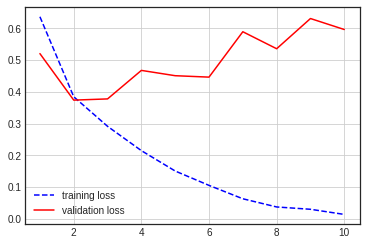

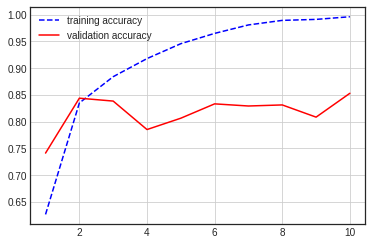

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss , 'b--', label='training loss')
plt.plot(epochs, val_loss , 'r', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc , 'b--', label='training accuracy')
plt.plot(epochs, val_acc , 'r', label='validation accuracy')
plt.grid()
plt.legend()

plt.show

training loss는 잘됐는데 validation 역시나 튐

In [37]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 29s 37ms/step - loss: 0.6353 - acc: 0.8476


[0.6352563500404358, 0.847599983215332]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [38]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
num_words = 10000
max_len = 500


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen =max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen =max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding

In [42]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [48]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 3s 21ms/step - loss: 0.0993 - acc: 0.9650 - val_loss: 0.3780 - val_acc: 0.8570
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0946 - acc: 0.9675 - val_loss: 0.3582 - val_acc: 0.8696
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0883 - acc: 0.9704 - val_loss: 0.4311 - val_acc: 0.8804
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0848 - acc: 0.9710 - val_loss: 0.4186 - val_acc: 0.8782
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0797 - acc: 0.9727 - val_loss: 0.3990 - val_acc: 0.8524
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0756 - acc: 0.9755 - val_loss: 0.4432 - val_acc: 0.8706
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0701 - acc: 0.9768 - val_loss: 0.4281 - val_acc: 0.8676
Epoch 8/10
157/157 [==============================] - 3s 20ms/step - 

### 시각화

<function matplotlib.pyplot.show(*args, **kw)>

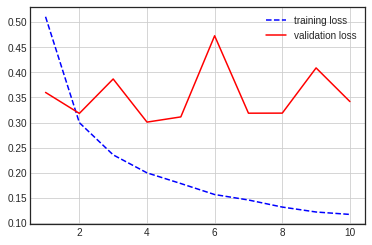

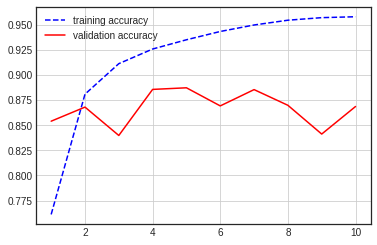

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss , 'b--', label='training loss')
plt.plot(epochs, val_loss , 'r', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc , 'b--', label='training accuracy')
plt.plot(epochs, val_acc , 'r', label='validation accuracy')
plt.grid()
plt.legend()

plt.show

### 모델 평가

In [47]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.3694 - acc: 0.8579


[0.3693881630897522, 0.8578799962997437]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [49]:
from tensorflow.keras.datasets import reuters

In [50]:
num_words =10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

2121728/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
max_len = 300 

In [53]:
pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(len(pad_x_train[0]))

300


In [54]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense, Embedding

In [56]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=256))
model.add(GRU(256, return_sequences= True))
model.add(GRU(128))
model.add(Dense(46,activation='softmax'))

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 256)         2560000   
                                                                 
 gru (GRU)                   (None, None, 256)         394752    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_5 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [57]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32, epochs= 20,
                    validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 11s 35ms/step - loss: 2.0139 - acc: 0.4715 - val_loss: 1.6742 - val_acc: 0.5593
Epoch 2/20
225/225 [==============================] - 7s 32ms/step - loss: 1.6728 - acc: 0.5807 - val_loss: 1.5999 - val_acc: 0.6038
Epoch 3/20
225/225 [==============================] - 8s 34ms/step - loss: 1.3395 - acc: 0.6637 - val_loss: 1.4233 - val_acc: 0.6361
Epoch 4/20
225/225 [==============================] - 8s 34ms/step - loss: 1.0944 - acc: 0.7104 - val_loss: 1.3800 - val_acc: 0.6566
Epoch 5/20
225/225 [==============================] - 7s 32ms/step - loss: 0.8834 - acc: 0.7715 - val_loss: 1.3303 - val_acc: 0.6839
Epoch 6/20
225/225 [==============================] - 7s 32ms/step - loss: 0.7306 - acc: 0.8121 - val_loss: 1.4029 - val_acc: 0.6706
Epoch 7/20
225/225 [==============================] - 7s 32ms/step - loss: 0.5872 - acc: 0.8522 - val_loss: 1.3767 - val_acc: 0.6956
Epoch 8/20
225/225 [==============================] - 7s 32ms/step -

### 시각화

<function matplotlib.pyplot.show(*args, **kw)>

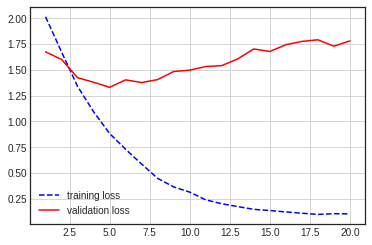

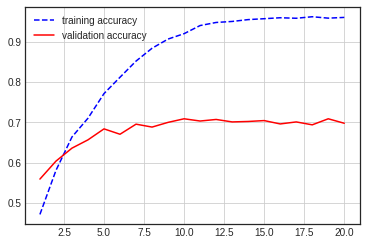

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss , 'b--', label='training loss')
plt.plot(epochs, val_loss , 'r', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc , 'b--', label='training accuracy')
plt.plot(epochs, val_acc , 'r', label='validation accuracy')
plt.grid()
plt.legend()

plt.show

### 모델 평가


In [59]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 12ms/step - loss: 1.9890 - acc: 0.6834


[1.9890352487564087, 0.6834372282028198]